In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r'nuclear-energy-generation.xlsx', sheet_name = 0)
df_backup = df.copy()

values = ['World']
df = df[df.Entity.isin(values) == False]

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2052 non-null   object 
 1   Code                  2052 non-null   object 
 2   Year                  2052 non-null   int64  
 3   Nuclear_Electricity   2052 non-null   float64
 4   Annual_CO2_emissions  2052 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 96.2+ KB


,Entity,Code,Year,Nuclear_Electricity,Annual_CO2_emissions
0,Argentina,ARG,1965,0.00,2.666444
1,Argentina,ARG,1966,0.00,2.815352
2,Argentina,ARG,1967,0.00,2.877178
3,Argentina,ARG,1968,0.00,2.985735
4,Argentina,ARG,1969,0.00,3.291103
...,...,...,...,...,...
2047,United States,USA,2017,804.95,15.800776
2048,United States,USA,2018,807.08,16.187923
2049,United States,USA,2019,809.41,15.730885
2050,United States,USA,2020,789.88,14.037217


In [4]:
col = df.columns
col

Index(['Entity', 'Code', 'Year', 'Nuclear_Electricity',
       'Annual_CO2_emissions'],
      dtype='object')

In [5]:
nominales = ['Entity', 'Code']
intervalo = ['Year']
razon = ['Nuclear_Electricity', 'Annual_CO2_emissions']

In [6]:
df['Entity'] = df['Entity'].astype('category')
df['Code'] = df['Code'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2051
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Entity                2052 non-null   category
 1   Code                  2052 non-null   category
 2   Year                  2052 non-null   int64   
 3   Nuclear_Electricity   2052 non-null   float64 
 4   Annual_CO2_emissions  2052 non-null   float64 
dtypes: category(2), float64(2), int64(1)
memory usage: 70.8 KB


In [7]:
for i in nominales:
    print(i)
    print(df[i].unique())

Entity
['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', ..., 'Taiwan', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']
Length: 36
Categories (36, object): ['Argentina', 'Armenia', 'Belarus', 'Belgium', ..., 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']
Code
['ARG', 'ARM', 'BLR', 'BEL', 'BRA', ..., 'TWN', 'UKR', 'ARE', 'GBR', 'USA']
Length: 36
Categories (36, object): ['ARE', 'ARG', 'ARM', 'BEL', ..., 'TWN', 'UKR', 'USA', 'ZAF']


### Hallazgo

+ Los datos nominales "Entity" y "Code" son considerados de alta cardinalidad debido que presentan una alta cantidad de valores únicos.

In [8]:
df.Entity.value_counts()

Argentina               57
Armenia                 57
Netherlands             57
Pakistan                57
Romania                 57
Russia                  57
Slovakia                57
Slovenia                57
South Africa            57
South Korea             57
Spain                   57
Sweden                  57
Switzerland             57
Taiwan                  57
Ukraine                 57
United Arab Emirates    57
United Kingdom          57
Mexico                  57
Lithuania               57
Kazakhstan              57
Czechia                 57
Belarus                 57
Belgium                 57
Brazil                  57
Bulgaria                57
Canada                  57
China                   57
Finland                 57
Japan                   57
France                  57
Germany                 57
Hungary                 57
India                   57
Iran                    57
Italy                   57
United States           57
Name: Entity, dtype: int64

### Hallazgo

+ Se observa que todos los países poseen la misma cantidad de entradas debido que el intervalo de años se acoto desde 1965 a 2021, permitiendo así un estudio más homogéneo y más representativo.

In [9]:
Entities = df.Entity.unique()
Entities

['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', ..., 'Taiwan', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']
Length: 36
Categories (36, object): ['Argentina', 'Armenia', 'Belarus', 'Belgium', ..., 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

C:\Users\david\AppData\Local\Temp\ipykernel_3564\229565180.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


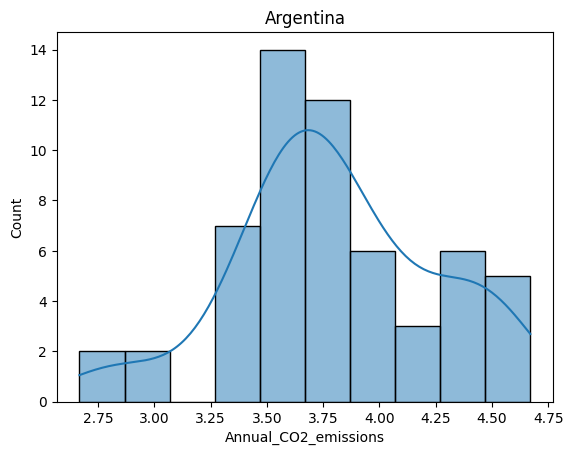

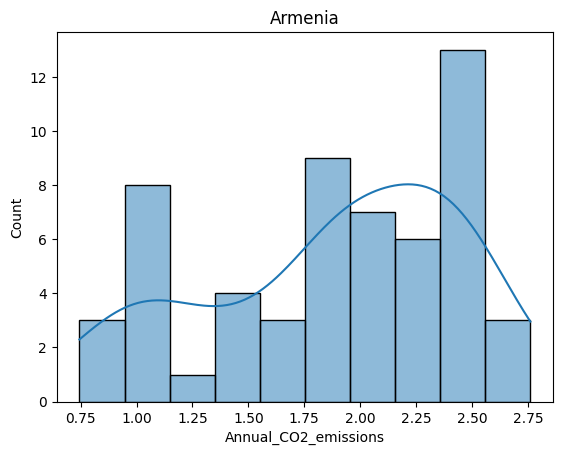

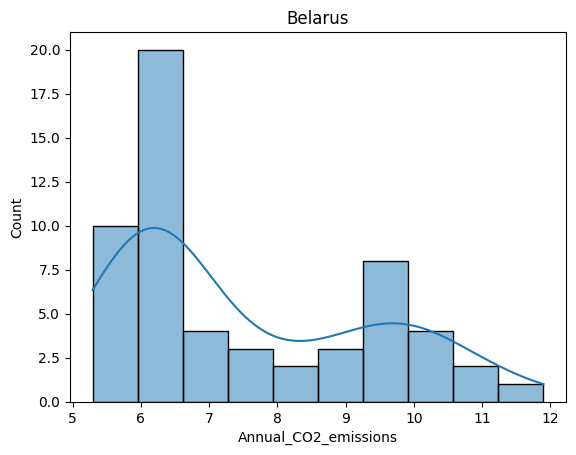

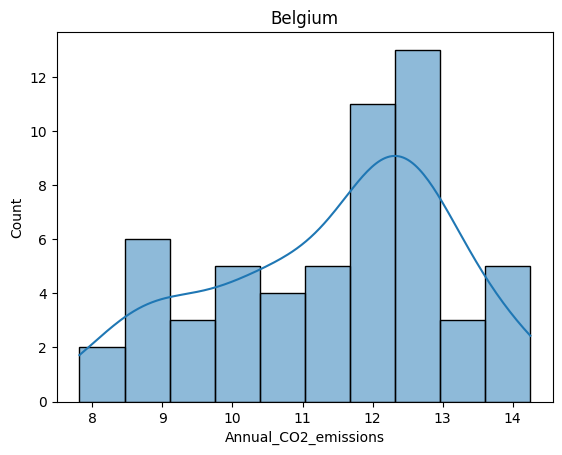

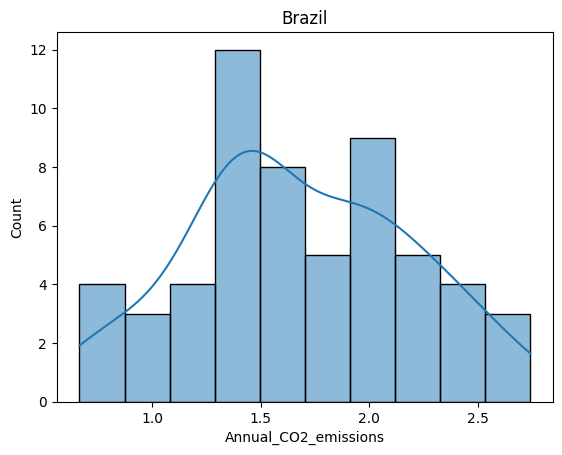

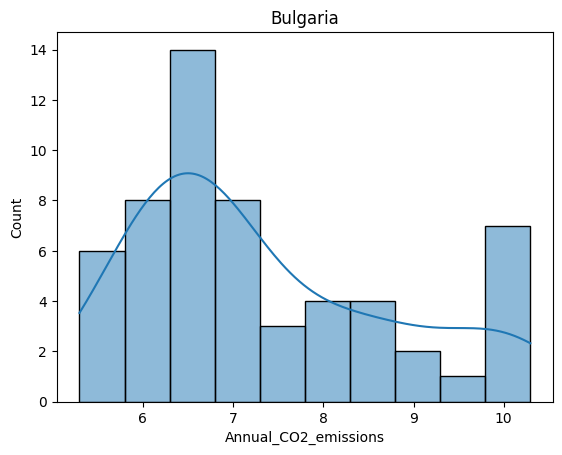

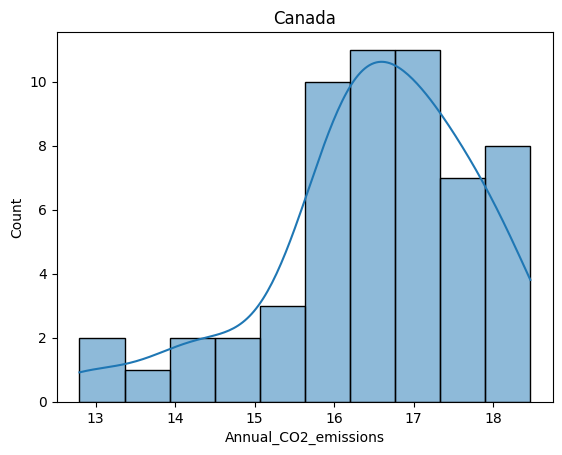

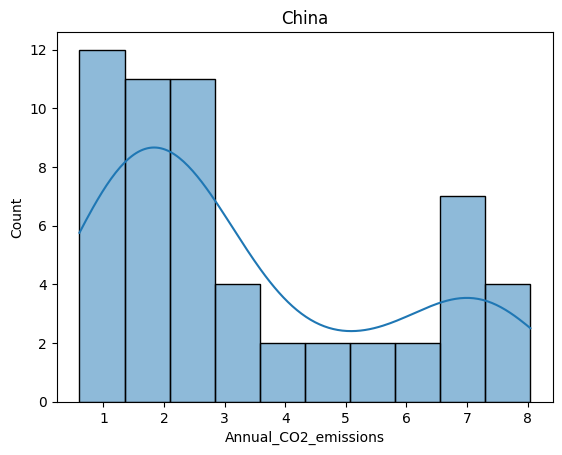

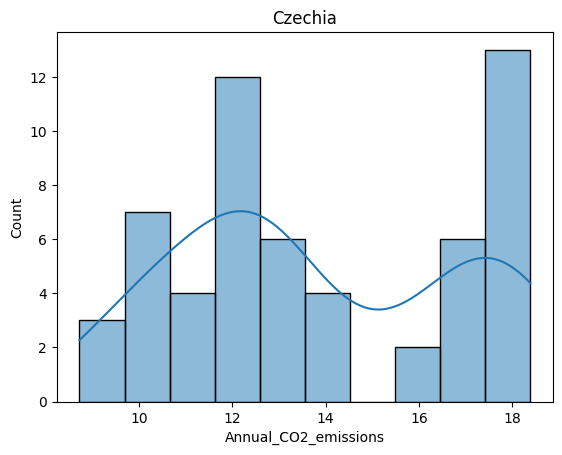

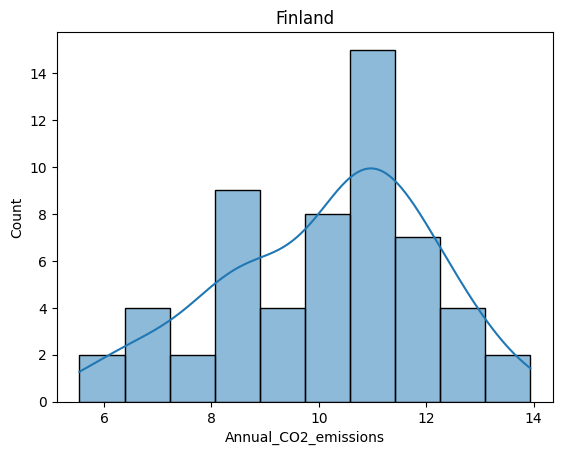

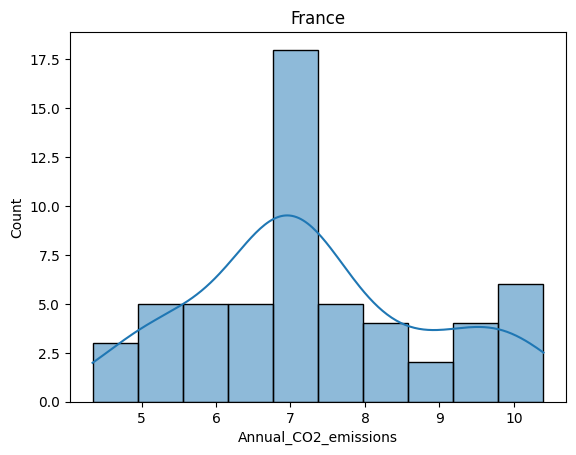

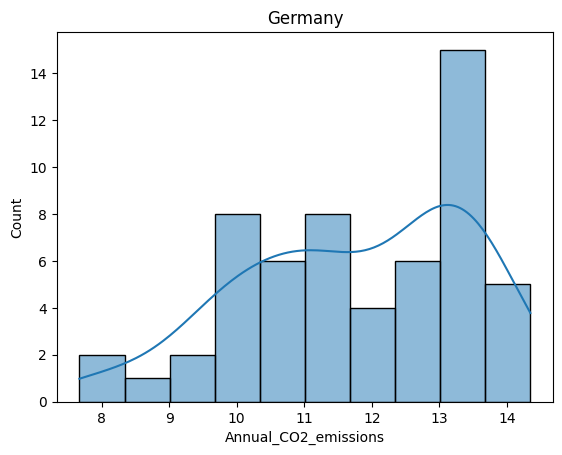

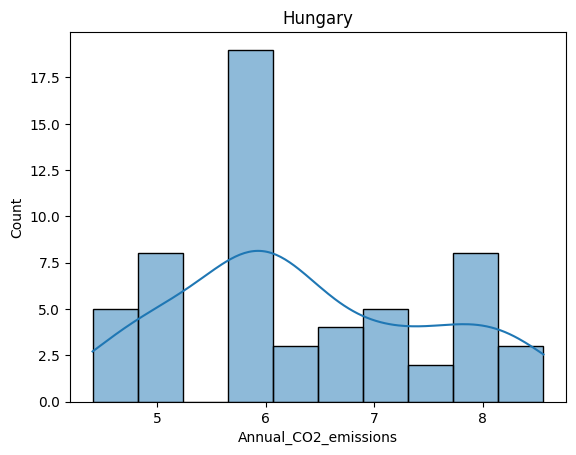

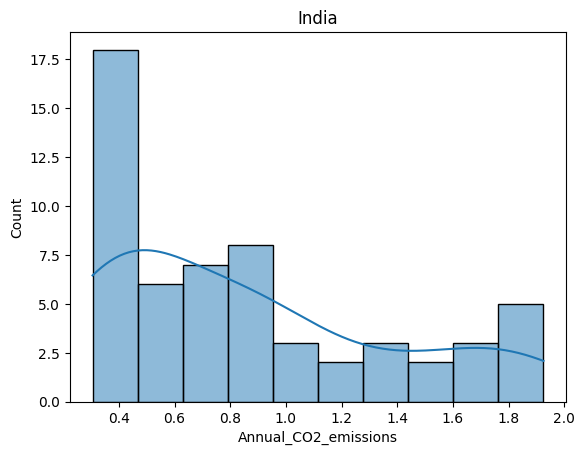

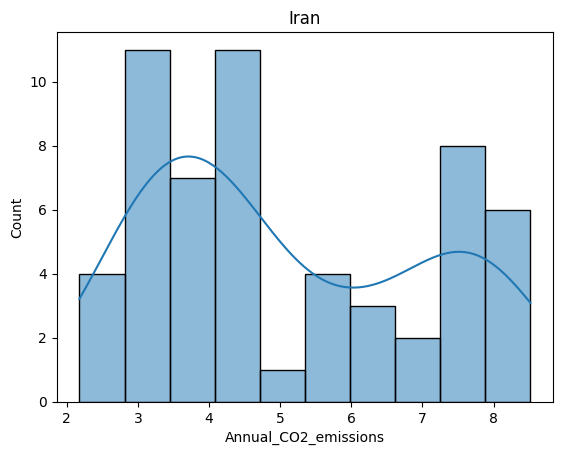

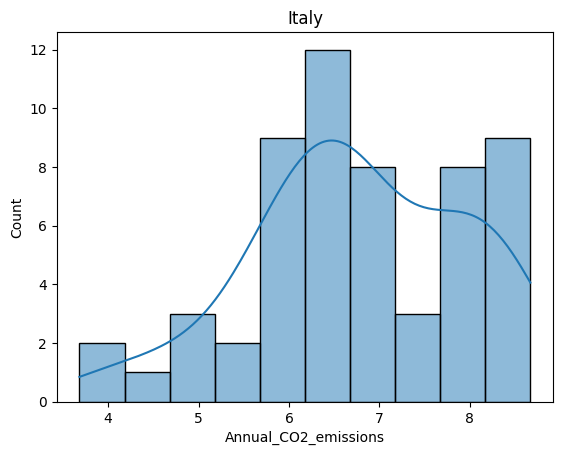

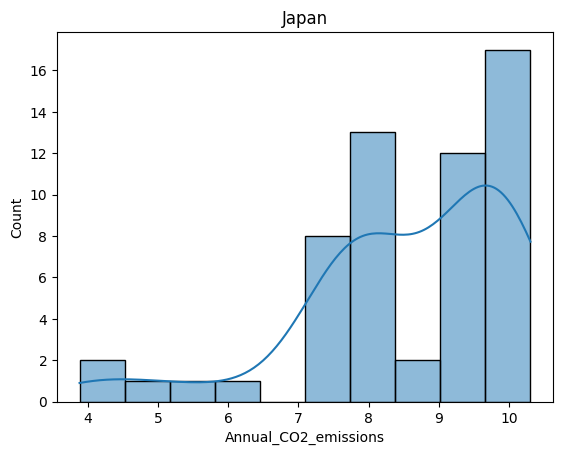

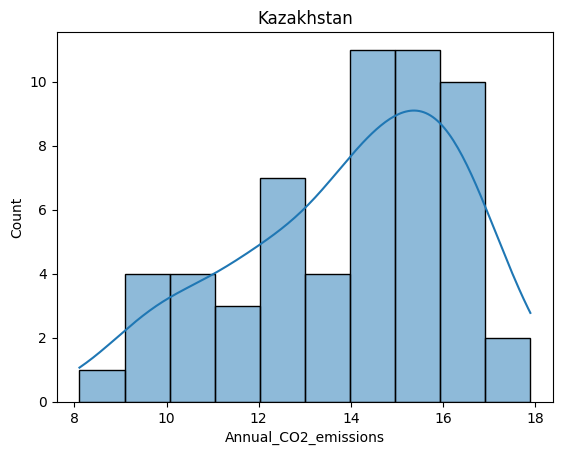

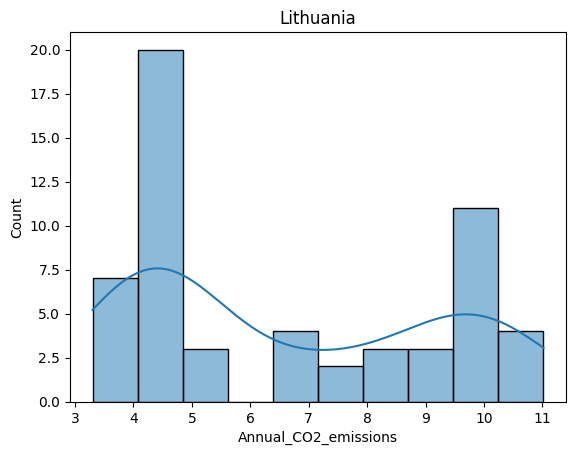

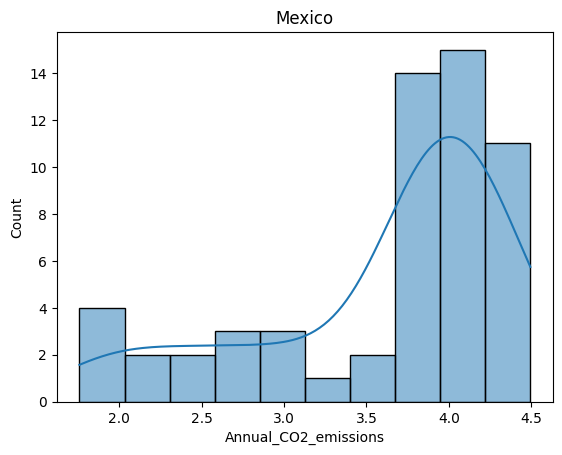

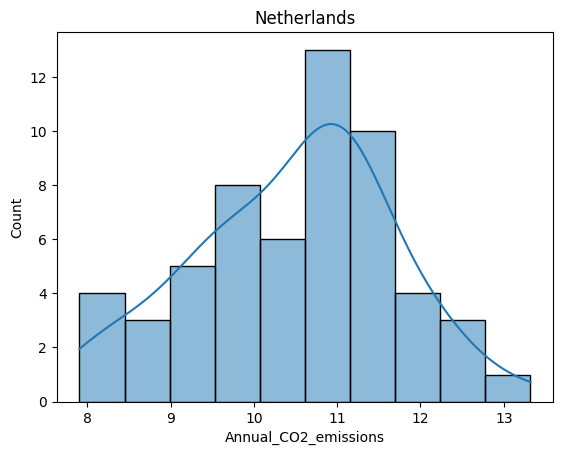

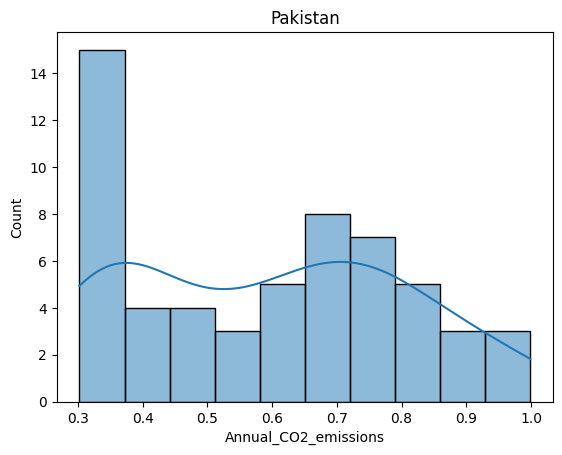

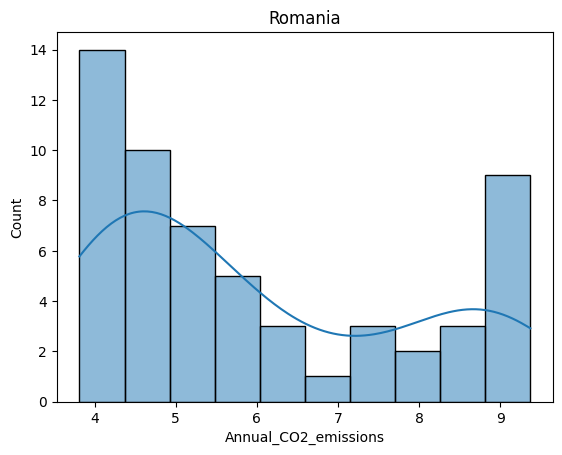

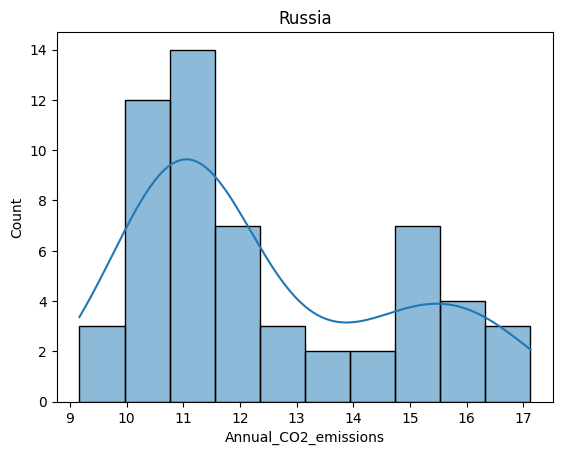

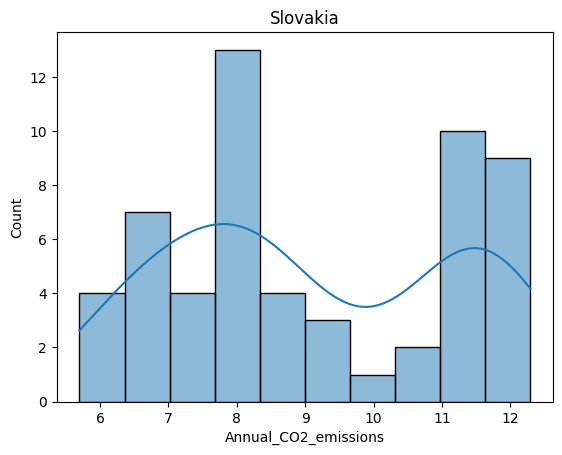

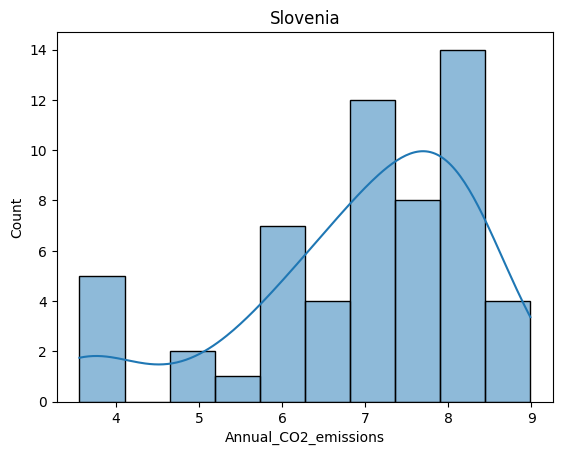

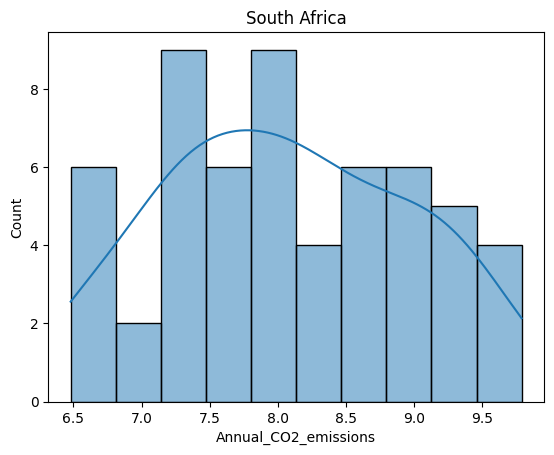

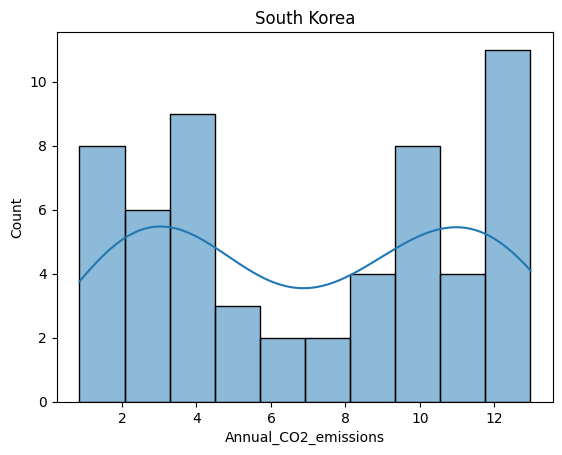

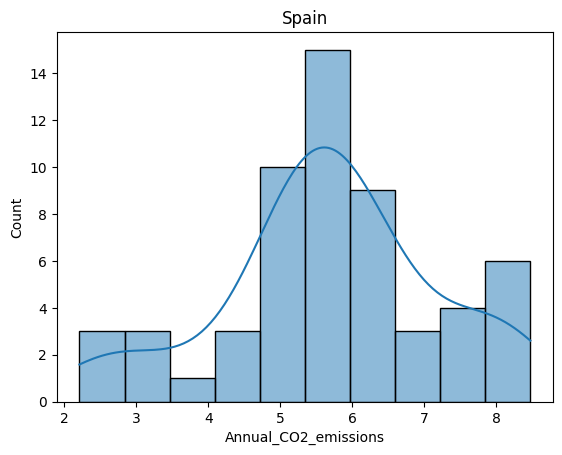

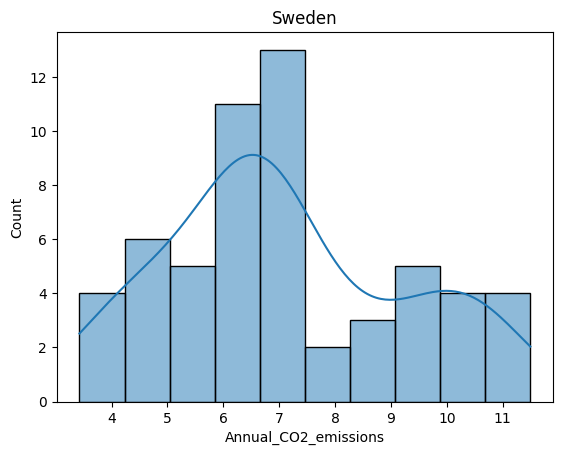

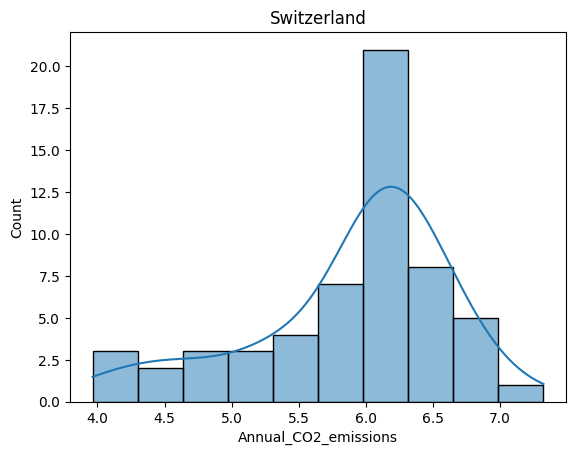

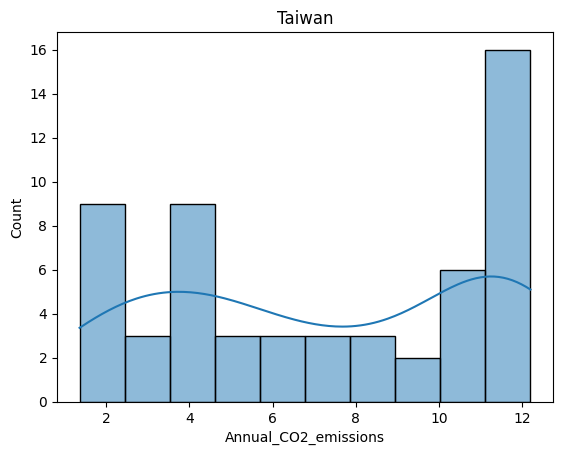

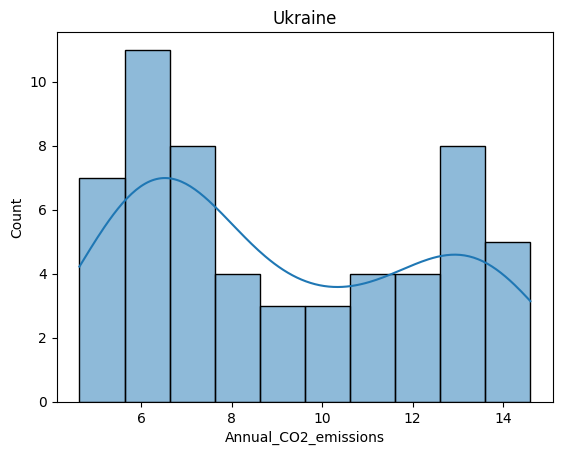

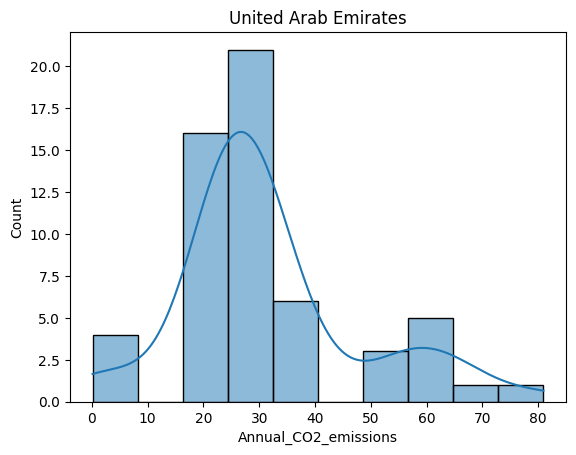

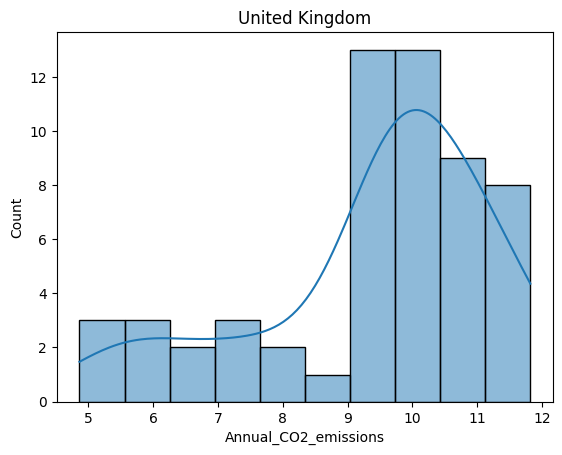

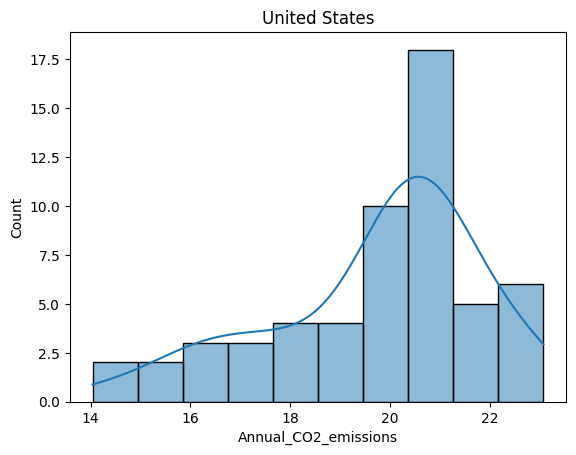

In [10]:
for country in Entities:
    formatedData = df.loc[df['Entity'] == country]
    plt.figure()
    sns.histplot(data = formatedData, x = 'Annual_CO2_emissions',kde = True, bins=10).set(title=country)


### Hallazgo

+ A partir de lo anterior se observa de manera general los valores de las emisiones de CO$_{2}$ para cada país.
+ Países que presentaron en sus histogramas una frecuencia alta de emisiones de CO$_{2}$, entre 20 y 30 toneladas, fueron United States y United Arab Emirates.

C:\Users\david\AppData\Local\Temp\ipykernel_3564\2292727001.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


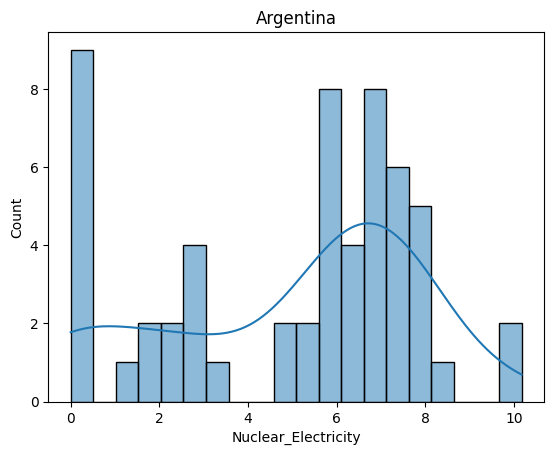

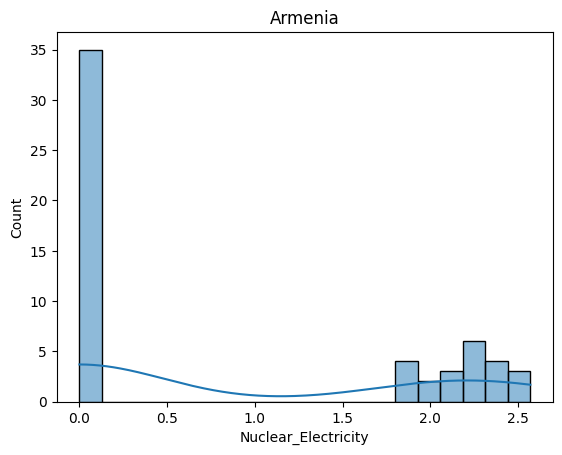

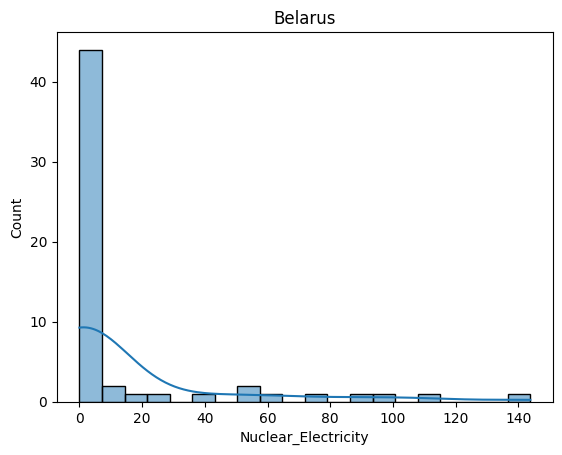

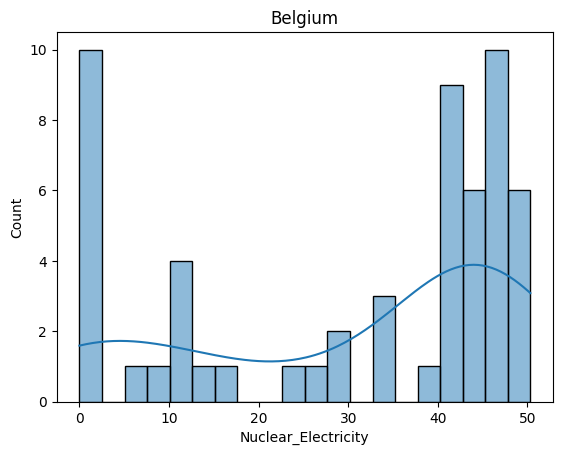

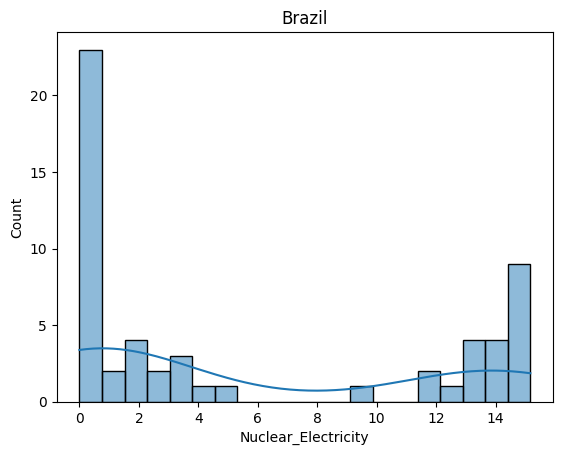

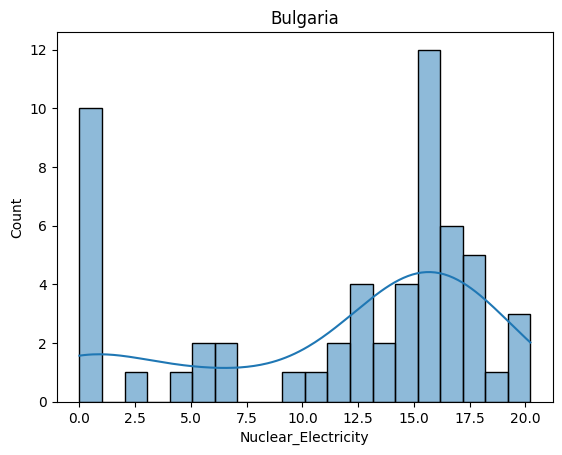

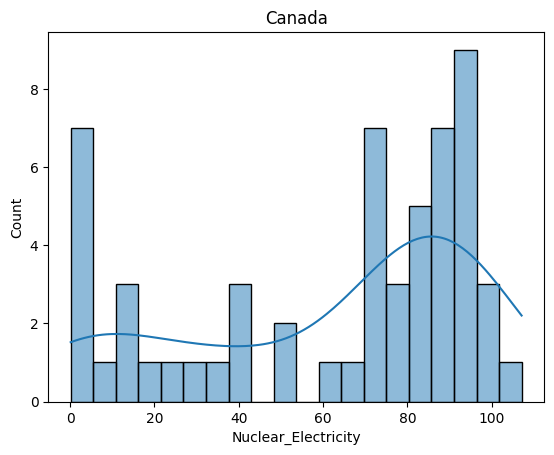

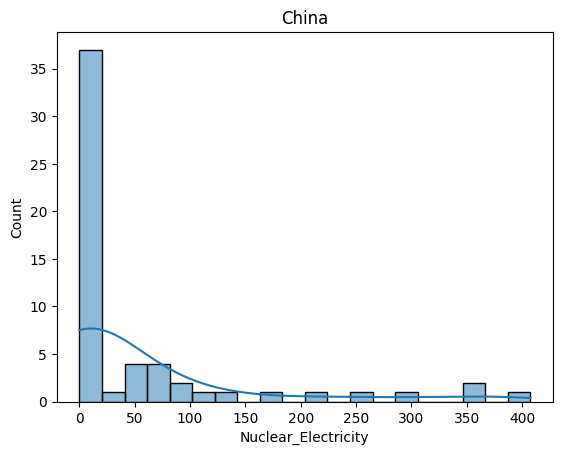

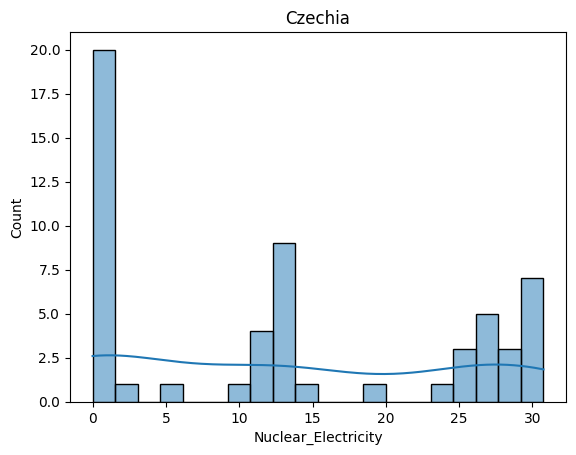

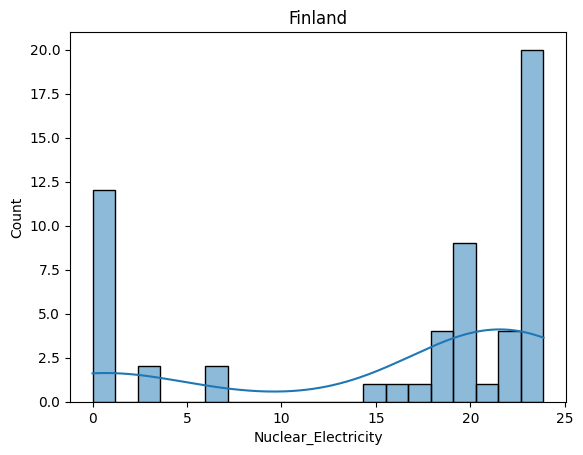

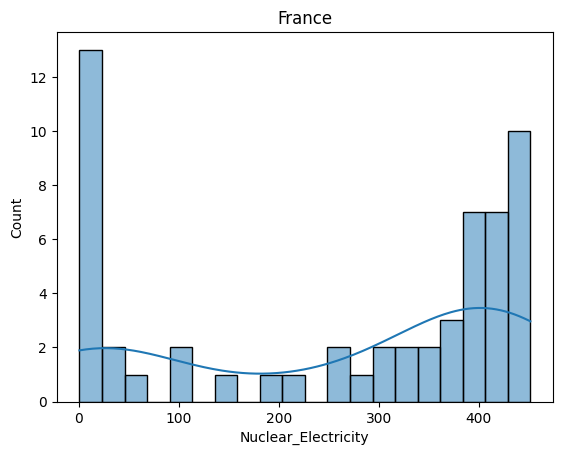

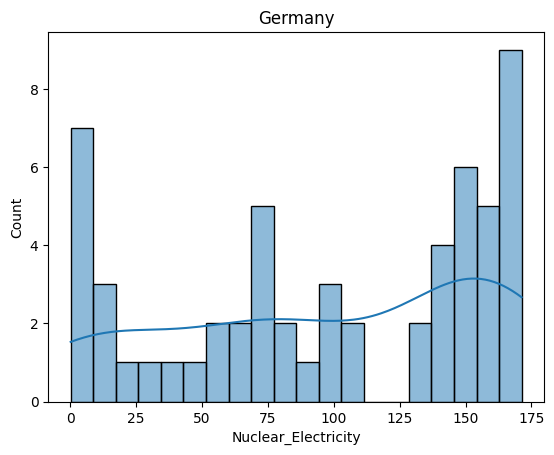

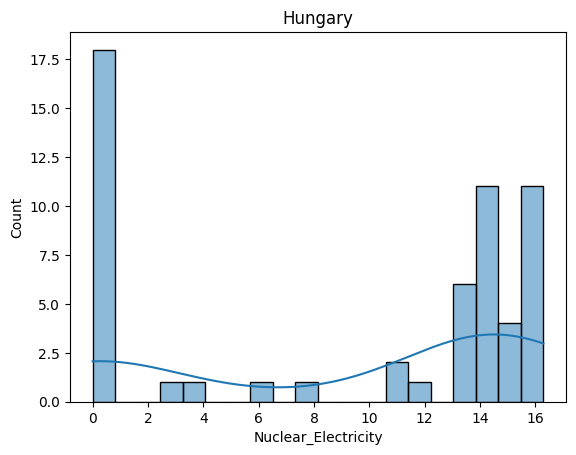

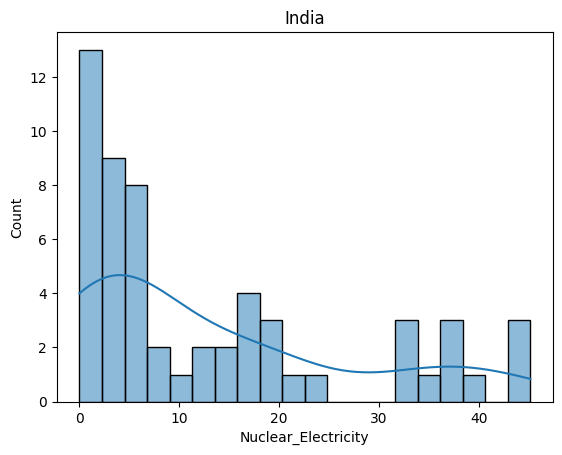

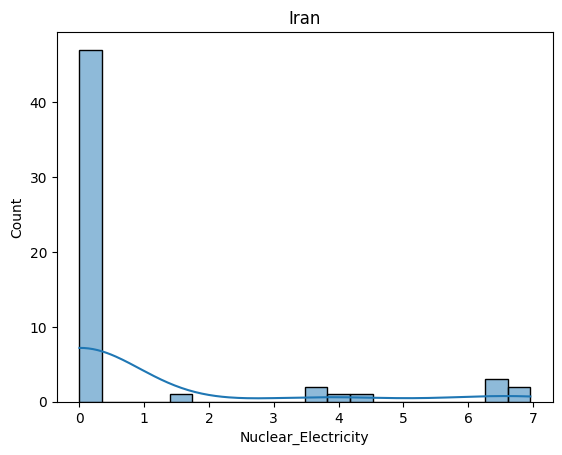

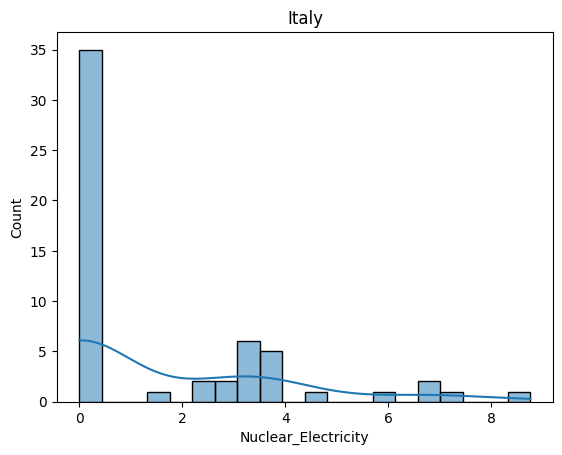

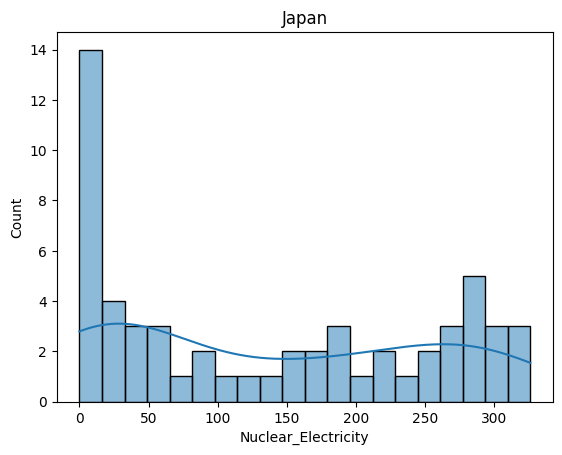

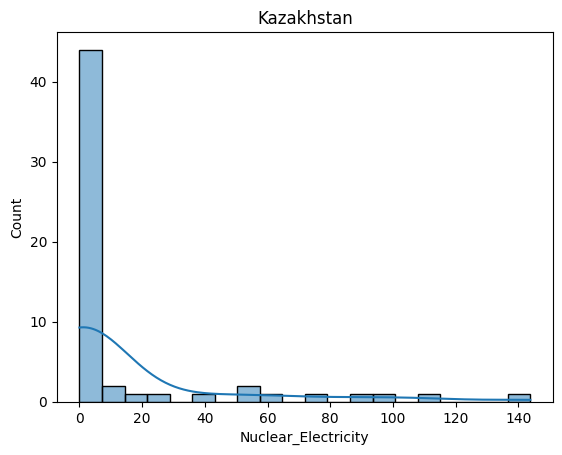

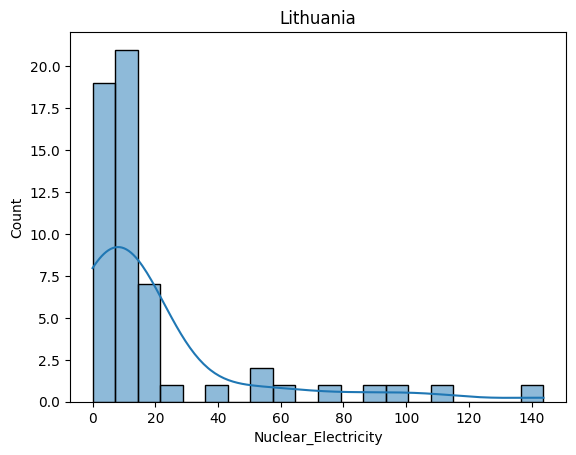

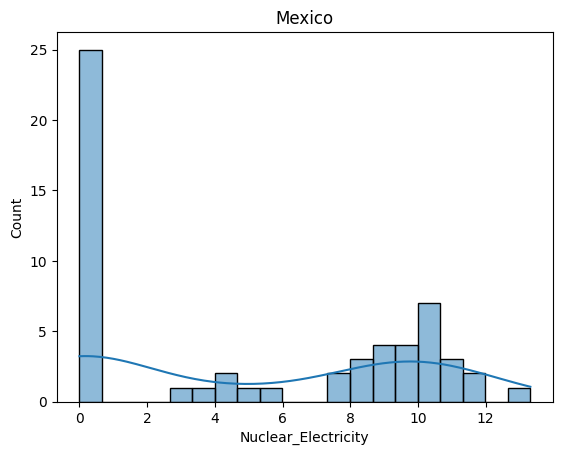

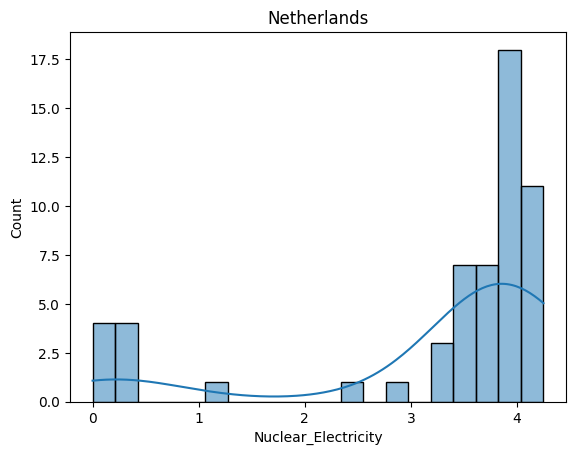

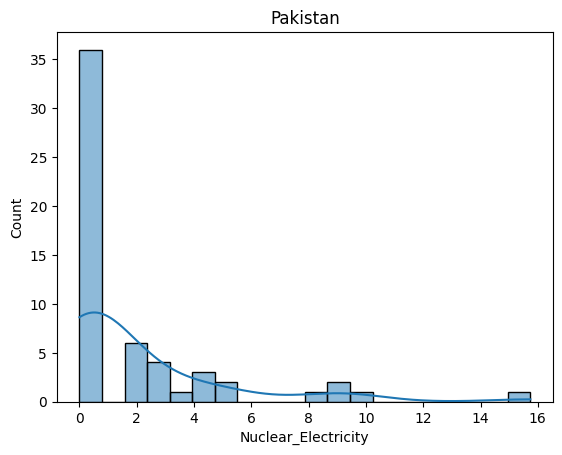

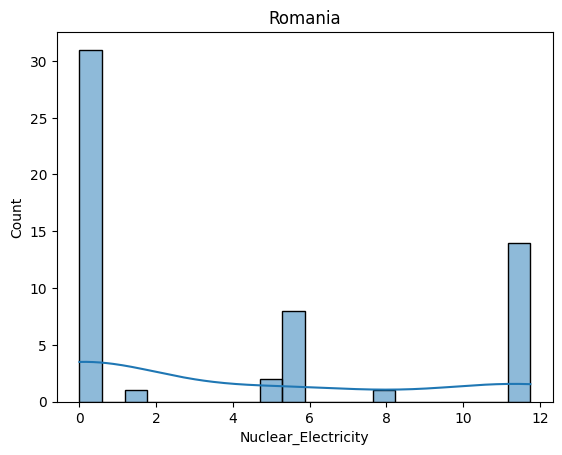

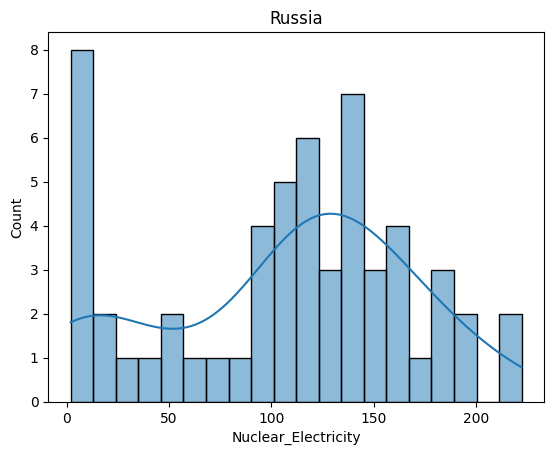

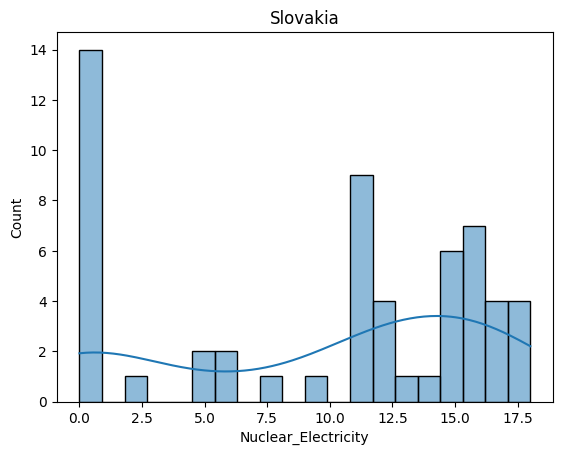

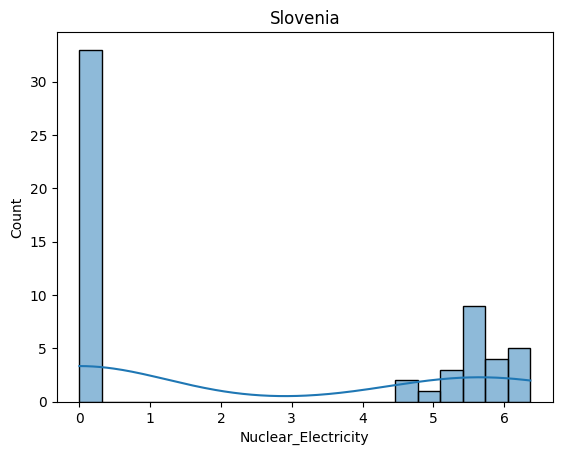

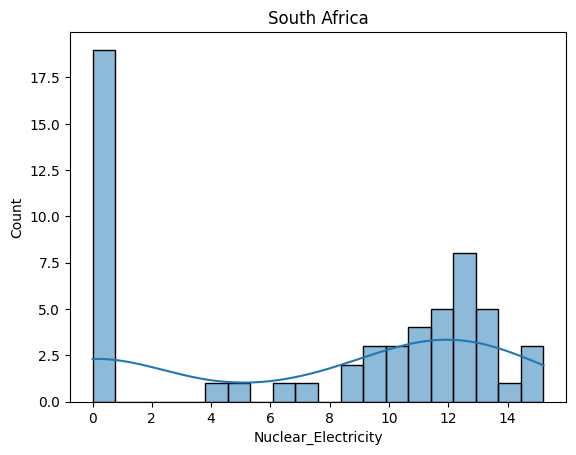

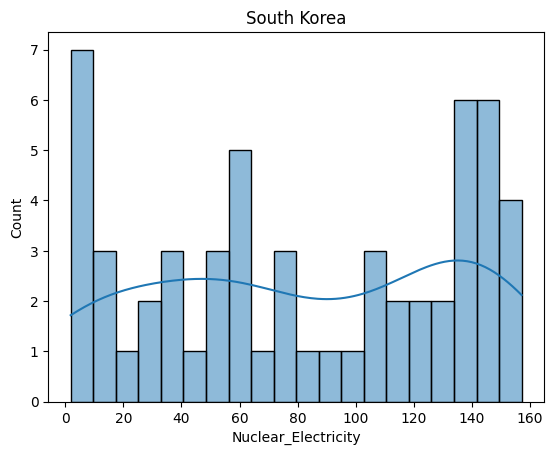

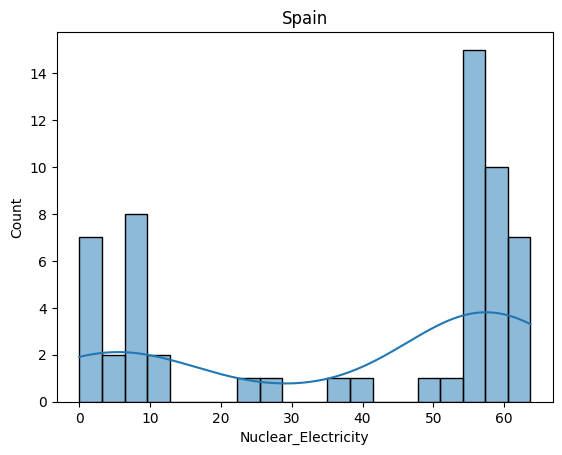

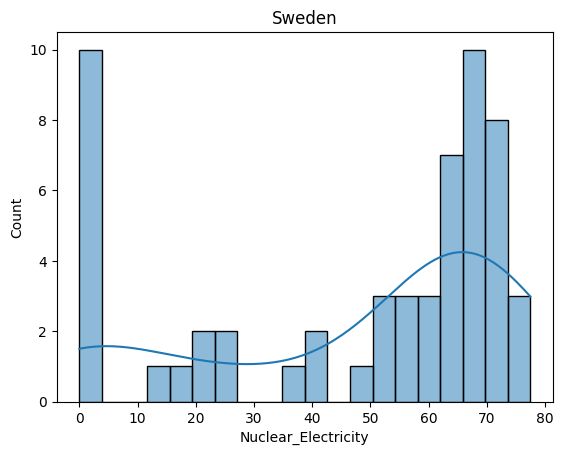

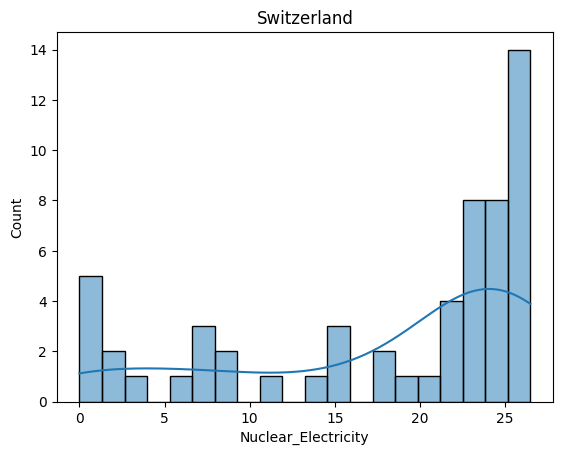

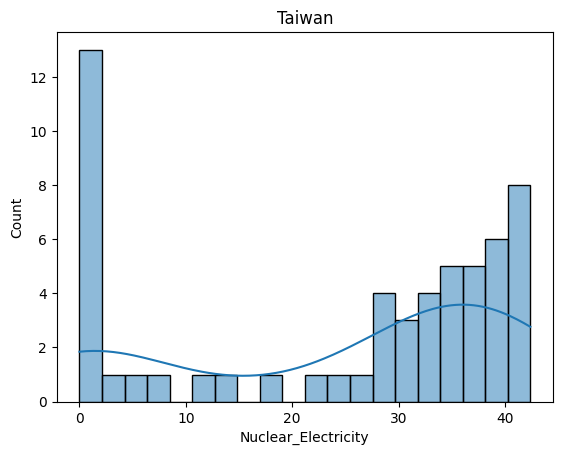

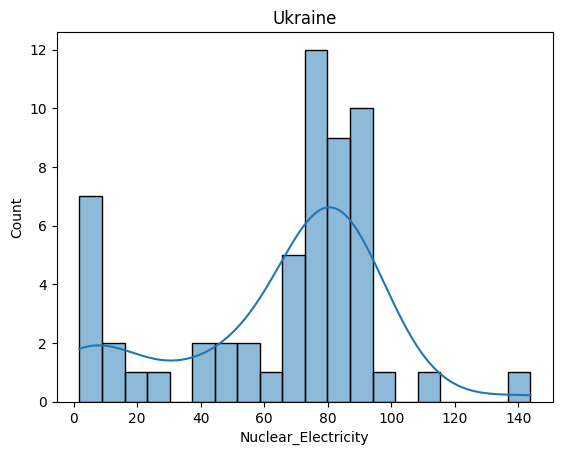

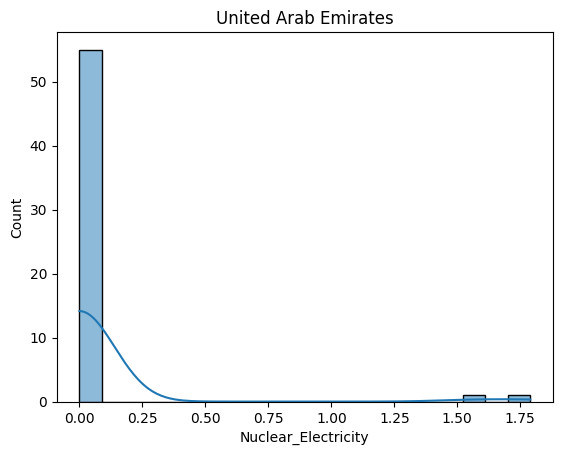

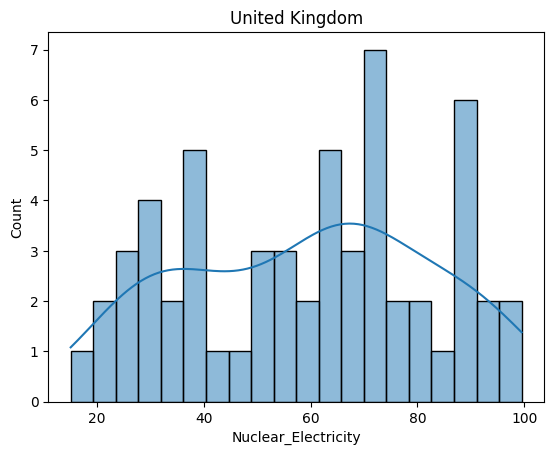

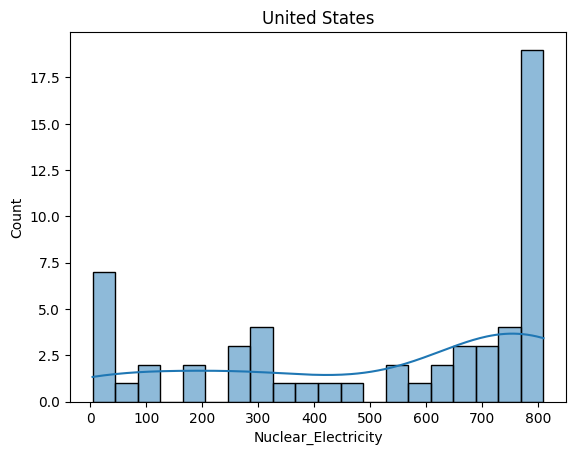

In [11]:
for country in Entities:
    formatedData = df.loc[df['Entity'] == country]
    plt.figure()
    sns.histplot(data=formatedData, x='Nuclear_Electricity', kde=True, bins=20).set(title=country)

### Hallazgo

+ Para todos los países se observa de manera general una producción de energía nuclear intermitente, presentando alta frecuencia en valores cercanos a cero y con menor frecuencia en otros valores.
+ Puesto que para una gran parte de los países presentados en el dataset las tecnologías necesarias para generar la energía nuclear fueron adoptadas posteriormente a 1965, existe una discrepancia, no permitiendo que la comparasión de los histogramas sea representativo.

In [12]:
AritmeticOPerations = df.groupby(by='Entity')['Nuclear_Electricity','Annual_CO2_emissions']

C:\Users\david\AppData\Local\Temp\ipykernel_3564\2849249711.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AritmeticOPerations = df.groupby(by='Entity')['Nuclear_Electricity','Annual_CO2_emissions']


In [13]:
AritmeticOPerations.mean()

,Nuclear_Electricity,Annual_CO2_emissions
Entity,,
Argentina,4.977175,3.799055
Armenia,0.850526,1.881491
Belarus,14.399708,7.510111
Belgium,30.501860,11.442265
Brazil,5.642649,1.676097
Bulgaria,11.684579,7.335813
Canada,62.099263,16.505319
China,54.450667,3.329578
Czechia,13.149123,13.840003


### Hallazgo

+ Anualmente, la mayoría de los países presentan una producción media de energía nuclear menor a 20 TWh. 
+ De igual forma, anualmente la mayoría de los países generan al menos 10 toneladas de CO$_{2}$.
+ El país con menos producción de energía nuclear (United Arab Emirates) tiene la mayor taza de CO$_{2}$.

In [14]:
AritmeticOPerations.sum()

,Nuclear_Electricity,Annual_CO2_emissions
Entity,,
Argentina,283.699000,216.546118
Armenia,48.480000,107.244963
Belarus,820.783342,428.076306
Belgium,1738.606000,652.209084
Brazil,321.631000,95.537544
Bulgaria,666.021000,418.141355
Canada,3539.657995,940.803165
China,3103.688000,189.785949
Czechia,749.500000,788.880152


### Hallazgo

+ El país con mayor producción de energía nuclear a través de los años es Japón, con un valor de 7792.162860 TWh.	
+ El país con menor producción energía nuclear es United Arab Emirates.
+ El país con menor cantidad de producción de CO$_{2}$ es Pakistan.
+ El rango de produccion de energía nuclear es amplio, desde 3.35 TWh hasta 7792.162860 TWh.
+ El rango de generación de emisiones de CO$_{2}$ va desde 33.8875 toneladas hasta 1803.6192 toneladas.


In [15]:
AritmeticOPerations.min()

,Nuclear_Electricity,Annual_CO2_emissions
Entity,,
Argentina,0.000000,2.666444
Armenia,0.000000,0.744803
Belarus,0.000000,5.293781
Belgium,0.000000,7.816142
Brazil,0.000000,0.664164
Bulgaria,0.000000,5.296769
Canada,0.128000,12.794933
China,0.000000,0.604760
Czechia,0.000000,8.722278


### Hallazgo

+ En la mayoría de los países la producción de energía nuclear fue nula en cierto periodo de tiempo.
+ United Kingdom presenta el mínimo mayor de producción de energía nuclear.
+ La producción miníma de emisiones de CO$_{2}$ es de United Arab Emirates.
+ United States presenta el mínimo mayor de producción de CO$_{2}$.

In [16]:
AritmeticOPerations.max()

,Nuclear_Electricity,Annual_CO2_emissions
Entity,,
Argentina,10.17000,4.670683
Armenia,2.57000,2.761147
Belarus,143.79843,11.900442
Belgium,50.33000,14.251578
Brazil,15.17000,2.742072
Bulgaria,20.22000,10.295022
Canada,107.08421,18.469010
China,407.50000,8.045740
Czechia,30.75000,18.386303


### Hallazgo

+ El país con una mayor capacidad productiva de energía nuclear es United States.
+ El país con menor capacidad productiva de energía nuclear es United Arab Emirates.
+ Pakistan presenta la menor cantidad de emisiones de CO$_{2}$ entre los valores máximos.
+ El mayor productor de emisiones de CO$_{2}$ entre todos los países es Uniated Arab Emirates.

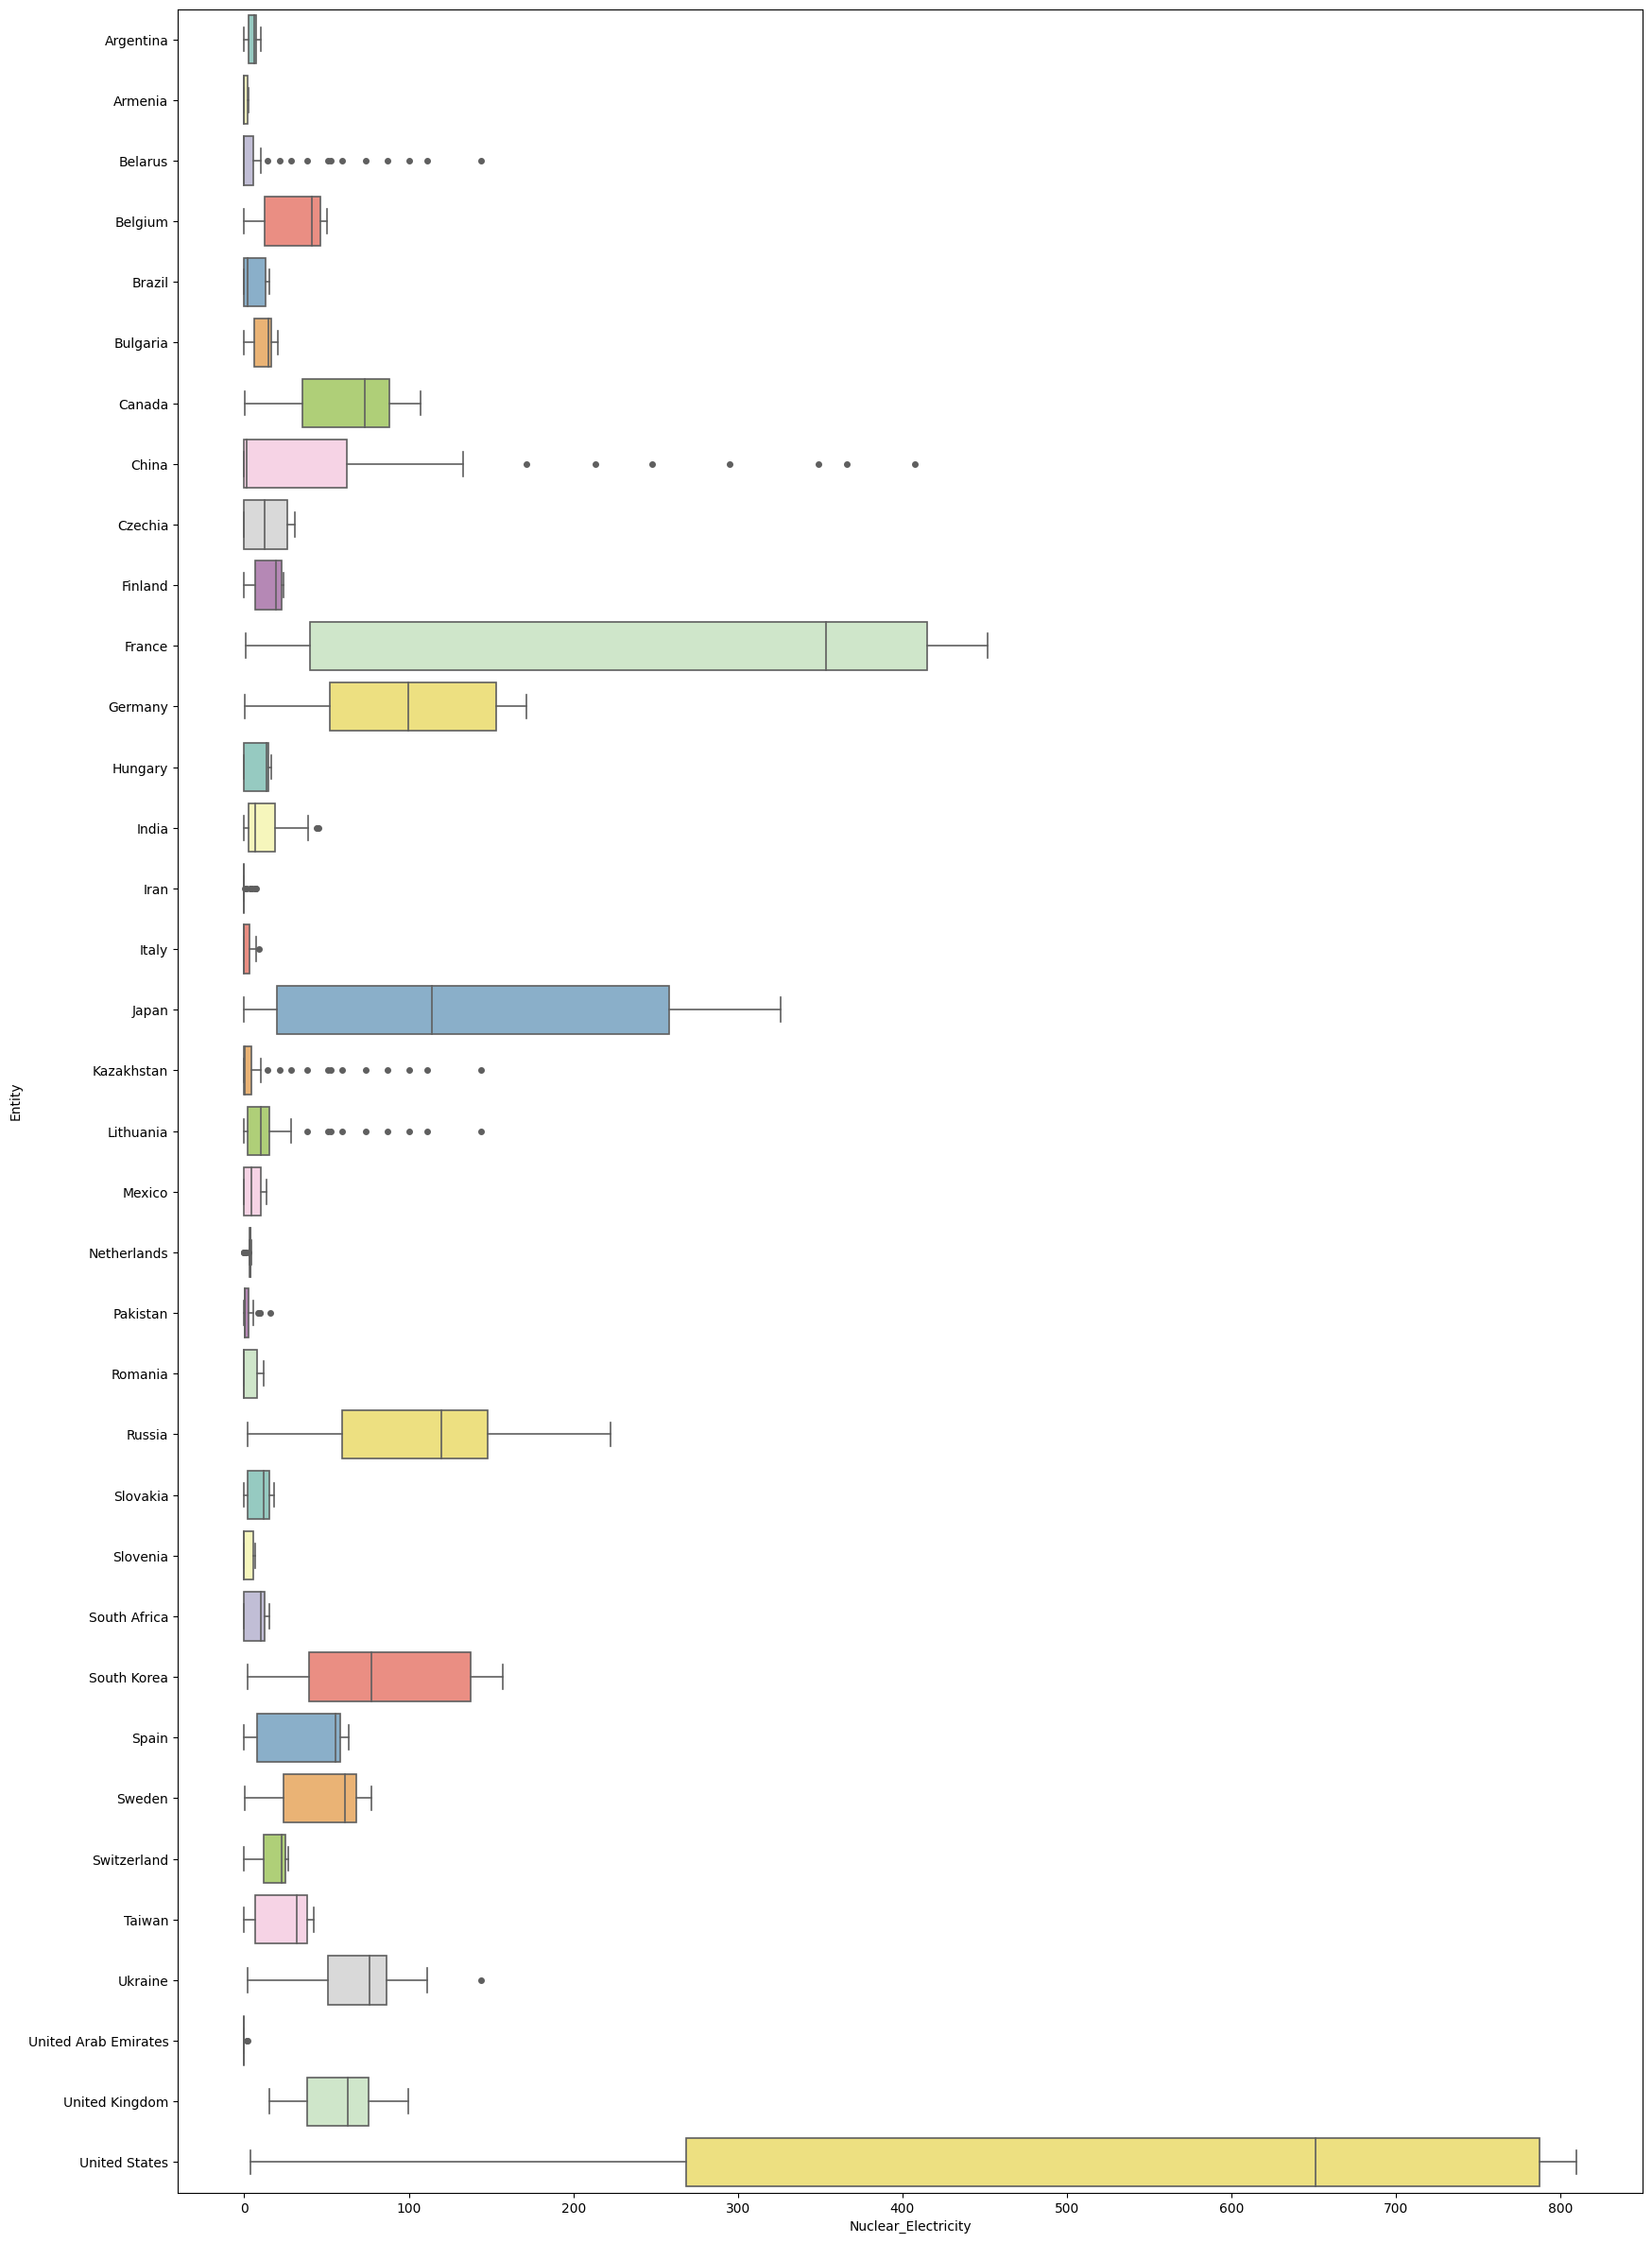

In [17]:
fig,ax = plt.subplots(figsize=(20,30))


sns.boxplot( palette='Set3', linewidth=1.2, fliersize=2, flierprops=dict(marker='o', markersize=4), x=df["Nuclear_Electricity"], y=df["Entity"])
    
plt.show()


### Hallazgo

+ El país con una mediana mayor en términos de producción de energía nuclear es United States.
+ El país con la mínima menor en términos de energía nuclear es United Arab Emirates.
+ Países aparte de Uniated States que presentan datos de generación de energia nuclear más variada son: France y Japan.